In [57]:
import numpy as np
import pandas as pd
from sklearn.linear_model import ElasticNetCV
import matplotlib.pyplot as plt
import csv
from cycler import cycler

In [3]:
line_cycler   = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["-", "--", "-.", ":", "-", "--", "-."]))
marker_cycler = (cycler(color=["#E69F00", "#56B4E9", "#009E73", "#0072B2", "#D55E00", "#CC79A7", "#F0E442"]) +
                 cycler(linestyle=["none", "none", "none", "none", "none", "none", "none"]) +
                 cycler(marker=["4", "2", "3", "1", "+", "x", "."]))
# matplotlib's standard cycler
standard_cycler = cycler("color", ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"])
plt.rc("axes", prop_cycle=line_cycler)
plt.rc("text", usetex=True)
plt.rc("text.latex", preamble=r"\usepackage{amssymb}\usepackage{mathtools}")
plt.rc("font", family="serif", size=18.)
plt.rc("savefig", dpi=500)
plt.rc("legend", loc="best", fontsize="medium", fancybox=True, framealpha=0.5)
plt.rc("lines", linewidth=2.5, markersize=4, markeredgewidth=2.5)

In [18]:
train_x = pd.read_csv('filtered_train_healthy.csv')

In [19]:
train_x

,cpgsite,train10738,train10739,train10740,train10741,train10742,train10743,train10744,train10745,train10746,...,train16994,train16995,train16996,train16997,train16998,train16999,train17000,train17001,train17002,train17003
0,cg00688681,0.588284,-0.035997,0.204671,0.144221,0.527819,0.459845,0.875837,0.502197,0.708031,...,-0.914682,-0.640954,-0.969175,-1.918093,NaN,-0.994389,-2.681278,-1.114405,-0.233002,-0.464061
1,cg02295369,0.318605,0.355631,0.277716,0.376304,0.228949,0.368026,0.443019,0.480968,1.806416,...,0.489446,0.422073,0.228949,-0.880658,0.566575,0.039997,-0.744433,-1.312567,0.372163,0.156286
2,cg04494122,-2.163468,-1.628272,-1.781880,-1.515914,-1.891498,-1.219330,-2.664729,-1.430239,-1.718460,...,0.689999,0.314505,0.176421,0.708031,NaN,0.455633,0.405382,0.104073,0.330922,0.944243
3,cg09513996,1.891498,1.710727,1.367282,1.972920,1.703036,1.773795,1.823018,1.757764,1.831393,...,0.544994,0.969175,0.694497,-0.359759,0.994389,0.614516,-0.969175,-1.411099,0.658700,0.847107
4,cg10856819,0.076021,-0.339147,-0.216802,-0.003999,-0.294042,-0.019997,0.000000,-0.269567,-0.273640,...,-2.616463,-2.681278,-2.698069,-3.744756,-3.744756,-2.089945,-3.938986,-3.744756,-2.120936,-2.264792
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31987,ch.22.33863861F,0.405382,0.294042,0.363891,0.192554,0.553611,0.703513,0.249233,0.739857,0.627708,...,-2.842141,-3.439160,-3.256540,-3.124904,-3.124904,-2.152700,-3.343970,-2.963760,-3.256540,-3.100385
31988,ch.22.38010425R,-1.856830,-1.367282,-2.039899,-1.991711,-1.687774,-1.936120,-1.757764,-1.749816,-1.056137,...,-3.507691,-4.322159,-4.247583,-4.247583,-3.993781,-4.112908,-4.112908,-3.619579,-4.112908,-4.322159
31989,ch.22.740407F,-2.362431,-2.570129,-1.495729,-2.482634,-1.972920,-2.881228,-2.110522,-1.991711,-1.324576,...,-4.940737,-5.093549,-4.940737,-4.940737,-4.940737,-4.112908,-6.163916,-4.585271,-4.489850,-4.940737
31990,ch.22.1008279F,-2.427712,-3.201956,-3.052934,-2.732410,-2.823096,-2.715111,-2.881228,-2.401172,-3.314031,...,-4.489850,-9.210440,-5.492861,-9.210440,-6.163916,-3.837361,-6.163916,-9.210440,-6.811545,-4.807960


In [20]:
train_x_T = train_x.T

In [21]:
del train_x

In [22]:
train_x_T

,0,1,2,3,4,5,6,7,8,9,...,31982,31983,31984,31985,31986,31987,31988,31989,31990,31991
cpgsite,cg00688681,cg02295369,cg04494122,cg09513996,cg10856819,cg13192155,cg14318199,cg17214408,cg17268992,cg17456701,...,ch.22.26167205F,ch.22.317144R,ch.22.26442001R,ch.22.467397R,ch.22.31817810F,ch.22.33863861F,ch.22.38010425R,ch.22.740407F,ch.22.1008279F,ch.22.47579720R
train10738,0.588284,0.318605,-2.163468,1.891498,0.076021,2.785946,0.417895,-2.375206,2.401172,-0.015997,...,-3.007447,-1.945225,-3.580953,-2.555085,-3.543689,0.405382,-1.85683,-2.362431,-2.427712,-1.306594
train10739,-0.035997,0.355631,-1.628272,1.710727,-0.339147,2.401172,-0.092047,-2.454856,2.264792,0.039997,...,-2.804368,-1.93612,-3.43916,-2.823096,-3.406479,0.294042,-1.367282,-2.570129,-3.201956,-0.929415
train10740,0.204671,0.277716,-1.78188,1.367282,-0.216802,1.642924,-0.039997,-2.511081,1.831393,0.180452,...,-3.701353,-1.35497,-3.374769,-2.785946,-2.715111,0.363891,-2.039899,-1.495729,-3.052934,-1.247949
train10741,0.144221,0.376304,-1.515914,1.97292,-0.003999,2.375206,0.489446,-2.540233,2.842141,-0.048,...,-3.744756,-2.555085,-2.749976,-3.007447,-3.993781,0.192554,-1.991711,-2.482634,-2.73241,-1.475799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
train16999,-0.994389,0.039997,0.455633,0.614516,-2.089945,-0.41372,-4.112908,-0.343263,0.875837,2.312634,...,-5.093549,-3.124904,-5.093549,-5.273603,-3.993781,-2.1527,-4.112908,-4.112908,-3.837361,-3.314031
train17000,-2.681278,-0.744433,0.405382,-0.969175,-3.938986,-1.536363,-3.580953,-1.741912,-0.51926,2.482634,...,-5.773449,NaN,-4.585271,-6.811545,-4.80796,-3.34397,-4.112908,-6.163916,-6.163916,-2.901295
train17001,-1.114405,-1.312567,0.104073,-1.411099,-3.744756,-2.001208,-4.178048,0.443019,-0.140201,2.555085,...,-4.80796,-3.993781,-4.690541,-4.585271,-3.580953,-2.96376,-3.619579,-4.585271,-9.21044,-3.314031
train17002,-0.233002,0.372163,0.330922,0.6587,-2.120936,0.144221,-4.112908,0.184485,1.174443,2.185284,...,-6.163916,-4.322159,-5.093549,-5.093549,-3.837361,-3.25654,-4.112908,-4.48985,-6.811545,-3.406479


In [23]:
train_x_T.columns = train_x_T.iloc[0] 
train_x_T = train_x_T[1:] 
#train_x_T.reset_index(drop=True, inplace=True) 
train_x_T.head()

cpgsite,cg00688681,cg02295369,cg04494122,cg09513996,cg10856819,cg13192155,cg14318199,cg17214408,cg17268992,cg17456701,...,ch.22.26167205F,ch.22.317144R,ch.22.26442001R,ch.22.467397R,ch.22.31817810F,ch.22.33863861F,ch.22.38010425R,ch.22.740407F,ch.22.1008279F,ch.22.47579720R
train10738,0.588284,0.318605,-2.163468,1.891498,0.076021,2.785946,0.417895,-2.375206,2.401172,-0.015997,...,-3.007447,-1.945225,-3.580953,-2.555085,-3.543689,0.405382,-1.85683,-2.362431,-2.427712,-1.306594
train10739,-0.035997,0.355631,-1.628272,1.710727,-0.339147,2.401172,-0.092047,-2.454856,2.264792,0.039997,...,-2.804368,-1.93612,-3.43916,-2.823096,-3.406479,0.294042,-1.367282,-2.570129,-3.201956,-0.929415
train10740,0.204671,0.277716,-1.78188,1.367282,-0.216802,1.642924,-0.039997,-2.511081,1.831393,0.180452,...,-3.701353,-1.35497,-3.374769,-2.785946,-2.715111,0.363891,-2.039899,-1.495729,-3.052934,-1.247949
train10741,0.144221,0.376304,-1.515914,1.97292,-0.003999,2.375206,0.489446,-2.540233,2.842141,-0.048,...,-3.744756,-2.555085,-2.749976,-3.007447,-3.993781,0.192554,-1.991711,-2.482634,-2.73241,-1.475799
train10742,0.527819,0.228949,-1.891498,1.703036,-0.294042,2.253116,0.485205,-2.230092,1.945225,-0.088039,...,-3.374769,-1.814692,-4.051632,-2.454856,-3.25654,0.553611,-1.687774,-1.97292,-2.823096,-1.136022


In [24]:
map_train_loc = "D:/archive/ai4bio_trainset/trainmap.csv"
map_train = pd.read_csv(map_train_loc, usecols = ['sample_id', 'age'], index_col = 0)

In [25]:
train_x_T.index.values

array(['train10738', 'train10739', 'train10740', ..., 'train17001',
       'train17002', 'train17003'], dtype=object)

In [26]:
# Keep only healthy elements
train_y = map_train.loc[train_x_T.index.values]

In [27]:
train_y

,age
sample_id,
train10738,100.0
train10739,94.0
train10740,81.0
train10741,85.0
train10742,80.0
...,...
train16999,0.0
train17000,74.4
train17001,69.0


## Imputation

In [48]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5) 
train_x_imp = pd.DataFrame(imputer.fit_transform(train_x_T), columns=train_x_T.columns)

In [49]:
train_x_imp.to_csv("train_healthy_knn_5_imp.csv")

In [4]:
train_x_imp = pd.read_csv("train_healthy_knn_5_imp.csv", index_col = 0)

## Dimension reduction (PCA)

In [5]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(train_x_imp)
print("scaled data")
pca = PCA(n_components=0.9)  # n_components=0.9 to keep 90% of the variance
principal_components = pca.fit_transform(scaled_data)

scaled data


In [7]:
pca.components_.shape

(196, 31992)

In [8]:
sum_abs_coefficients = np.sum(np.abs(pca.components_), axis=0)
sum_abs_coefficients.shape

(31992,)

In [9]:
sites = train_x_imp.columns.values

In [10]:
site_info = pd.read_csv("methylation_site_info.csv")
site_info

,Unnamed: 0,IlmnID,CHR,UCSC_RefGene_Name
0,0,cg07881041,19,PTPRS;PTPRS;PTPRS;PTPRS
1,1,cg18478105,20,YTHDF1
2,2,cg23229610,1,NaN
3,3,cg03513874,2,NaN
4,4,cg09835024,X,EIF2S3
...,...,...,...,...
452448,865912,cg10615271,12,ACVR1B
452449,865913,cg23079522,3,PPM1L
452450,865914,cg16818145,3,MCCC1
452451,865916,cg10633746,17,SMCR7;SMCR7;SMCR7;SMCR7


In [86]:
site_importance = pd.DataFrame({
    'Variable': sites,
    'Importance': sum_abs_coefficients
})
site_importance_sorted = site_importance.sort_values(by='Importance', ascending=False)
top_10 = site_importance_sorted.head(10)

In [94]:
top_10

,Variable,Importance
185,cg07838106,2.483650
5622,cg14192299,2.455126
5384,cg21235532,2.422832
23428,cg20098478,2.320339
26029,cg25620430,2.276063
4300,cg12645284,2.275715
2787,cg13746854,2.266066
21626,cg13580265,2.239757
16691,cg07236943,2.217310
8727,cg24723561,2.211583


In [96]:
# What are the top 10 most important genes?
site_info[site_info['IlmnID'].isin(top_10.Variable)]

,Unnamed: 0,IlmnID,CHR,UCSC_RefGene_Name
52903,93560,cg21235532,18,NaN
89025,158113,cg07236943,7,SGCE;SGCE;PEG10;SGCE;PEG10
89428,158902,cg12645284,15,ADAMTS7
95165,169287,cg13746854,9,KIAA1161
122992,219593,cg20098478,12,WIF1
127213,227241,cg25620430,15,NaN
241049,439276,cg13580265,11,CCKBR
260399,475940,cg24723561,1,SLC35F3
269248,492906,cg14192299,19,NANOS2
301345,555195,cg07838106,1,AKR7A3


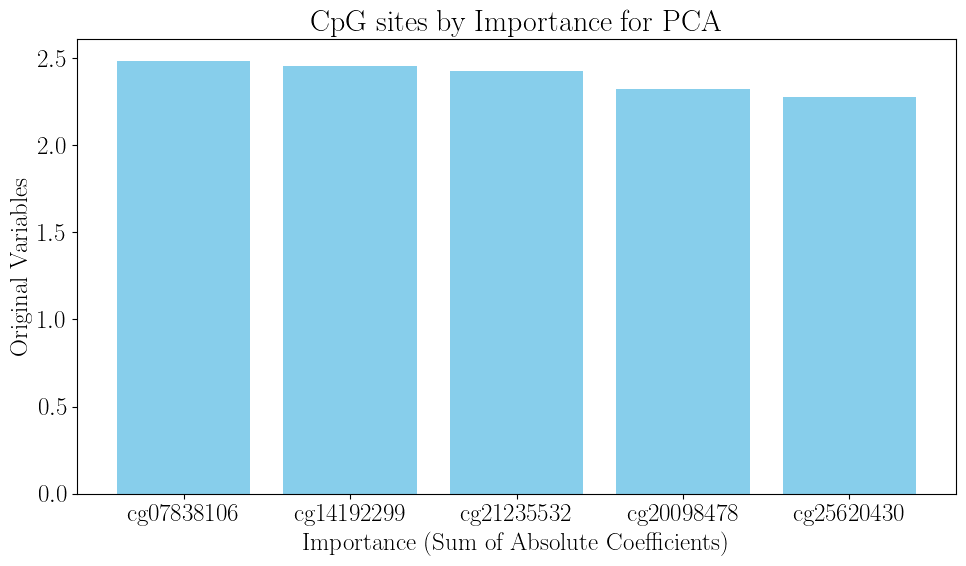

In [102]:
site_importance = pd.DataFrame({
    'Variable': sites,
    'Importance': sum_abs_coefficients
})
site_importance_sorted = site_importance.sort_values(by='Importance', ascending=False)
top_10 = site_importance_sorted.head(5)
plt.figure(figsize=(10, 6))
plt.bar(top_10['Variable'], top_10['Importance'], color='skyblue')

plt.xlabel('Importance (Sum of Absolute Coefficients)')
plt.ylabel('Original Variables')
plt.title('CpG sites by Importance for PCA')
plt.tight_layout()
plt.show()

In [11]:
pc_reduced = pd.DataFrame(principal_components)
pc_reduced.to_csv("pc_healthy.csv")

In [12]:
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import cross_val_score

In [28]:
train_y

,age
sample_id,
train10738,100.0
train10739,94.0
train10740,81.0
train10741,85.0
train10742,80.0
...,...
train16999,0.0
train17000,74.4
train17001,69.0


## Training

In [30]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [125]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [153]:
def evaluate_model(model, X, y, kf):
    """Evaluates a model using neg_mean_absolute_error for training and R^2 for evaluation."""
    
    # Perform cross-validation with neg_mean_absolute_error
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    mae_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='neg_mean_absolute_error')
    
    # Calculate R^2 score for each fold
    r2_scores = []
    for train_index, test_index in kf.split(X_train):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
         
        model.fit(X_train, y_train)
        y_test_pred = model.predict(X_test)
        r2_scores.append(r2_score(y_test, y_test_pred))

    # Evaluate the test set performance
    model.fit(X_train, y_train)
    y_test_pred = model.predict(X_test)
    r2_score_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    return (mae_scores, r2_scores, r2_score_test, mae_test)

In [155]:
# Linear Regression
lr_model = LinearRegression()
mae_scores, r2_scores, r2_test, mae_test = evaluate_model(lr_model, principal_components, train_y, kf)
mae_scores, r2_scores, r2_test, mae_test 

(array([-3.58262086, -4.09109374, -3.9906313 , -3.72003813, -3.80327788]),
 [0.9392646613368727,
  0.9519645879554757,
  0.9428507381835936,
  0.9536534798532587,
  0.9542799154132763],
 0.9542799154132763,
 3.839831511610335)

In [135]:
# Support Vector Regression (SVR)
svr_model = SVR(kernel='rbf') 
mae_scores, r2_scores, r2_test, mae_test = evaluate_model(svr_model, principal_components, train_y, kf)
mae_scores, r2_scores, r2_test, mae_test

c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataC

(array([-7.18031269, -6.5586861 , -6.5799676 , -6.47309316, -6.78901809]),
 [0.8406010926610147,
  0.8713763105859113,
  0.8573165217858548,
  0.8718103081209281,
  0.8653045459628466])

In [157]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
mae_scores, r2_scores, r2_test, mae_test = evaluate_model(rf_model, principal_components, train_y, kf)
mae_scores, r2_scores, r2_test, mae_test

c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1151: DataConvers

(array([-4.61324813, -4.70711977, -4.7431193 , -4.79506146, -4.60588985]),
 [0.9139593190970998,
  0.9219050813103422,
  0.9189972337973837,
  0.9200297639426158,
  0.9154646354513309],
 0.9154646354513309,
 4.787100673995298)

In [165]:
svr_model = SVR(kernel='linear') 
mae_scores, r2_scores, r2_test, mae_test = evaluate_model(svr_model, principal_components, train_y, kf)
mae_scores, r2_scores, r2_test, mae_test

c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataC

(array([-3.47490575, -3.96582075, -3.91685423, -3.67997387, -3.7431721 ]),
 [0.9322748848733904,
  0.9528456461543525,
  0.9351121158747421,
  0.9533043300285495,
  0.9518249477102789],
 0.9518249477102789,
 3.694089798839536)

In [184]:
svr_model = ElasticNet(alpha=0.5, l1_ratio = 0.02)
mae_scores, r2_scores, r2_test, mae_test = evaluate_model(svr_model, principal_components, train_y, kf)
mae_scores, r2_scores, r2_test, mae_test

c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.022e+03, tolerance: 2.844e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.548e+03, tolerance: 2.837e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the sca

(array([-3.56053612, -3.96204338, -3.99196972, -3.69301033, -3.77882005]),
 [0.9394360333194562,
  0.9576538748079425,
  0.9453559796128511,
  0.9557102808573252,
  0.9600900987105891],
 0.9600900987105891,
 3.710738149951712)

## After you ran cfffprize_buchinger.ipynb

In [32]:
svr_model = SVR(kernel='linear') 

In [34]:
svr_model.fit(principal_components, train_y)

c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [54]:
buch = pd.read_csv("buch_cols_p.csv", index_col=0)
buch

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,-31.516846,33.182113,-11.081704,-11.743489,-1.150103,-17.145093,-6.336358,-39.016966,-7.957690,11.579032,...,2.074160,1.843694,3.877998,-0.493510,0.453894,-2.976850,0.571532,0.114739,0.695499,0.163872
1,-27.450378,31.542762,-9.900431,-6.037854,-2.488476,-17.944106,-9.551112,-42.034273,-11.973027,12.590085,...,2.549873,2.412911,3.309524,-0.067367,-0.198632,-2.921579,-0.149593,-0.128233,0.289801,0.798397
2,-28.468824,30.390006,-8.874447,-6.914219,-2.242881,-17.814436,-9.426603,-40.119696,-9.724383,11.810516,...,1.890610,2.708818,3.758443,-1.274380,-0.415605,-1.674043,0.892910,0.345968,0.112886,-0.152432
3,-25.814400,28.314240,-8.091449,0.608762,-1.804083,-18.005221,-8.293753,-45.237554,-13.103385,14.381273,...,1.910672,1.583310,3.897728,0.908738,-0.173279,-1.917106,0.469855,0.811288,0.371066,0.162930
4,-22.060431,32.585562,-11.209990,-1.365192,-2.119959,-17.407019,-10.623262,-49.241415,-18.157862,17.755682,...,2.094762,2.603831,3.713400,0.529641,-0.369914,-2.746799,0.421936,0.273148,-0.115384,-0.807100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,-25.968592,36.444743,-14.376011,-9.386615,-3.202809,-13.611681,-10.210937,-46.182780,-12.730084,14.752671,...,1.336957,2.697772,3.649379,0.135551,1.307095,-2.695287,-0.302584,0.752957,0.567614,0.796407
92,-28.224519,36.488759,-15.107244,-10.970200,-3.151861,-14.038427,-10.019895,-44.747878,-11.129665,13.231130,...,2.137850,2.432010,3.000070,-0.616036,1.278562,-2.431059,0.129182,-0.111906,0.516135,1.264719
93,-30.985127,26.912772,-5.838624,2.881647,0.123133,-25.747091,-3.048885,-44.561057,-10.784586,13.151107,...,2.371735,2.300701,3.056320,-0.035504,-0.165007,-1.897601,0.712897,-0.283068,0.559934,1.404218
94,-30.886983,30.555437,-9.044477,-2.586401,-0.484823,-25.026935,-3.821522,-44.757721,-12.084769,13.695507,...,2.949876,2.306940,3.929325,0.767380,1.425411,-2.870157,0.307508,0.754453,0.395714,-1.062673


In [55]:
ages_buch = svr_model.predict(buch)

c:\Users\amroa\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(


In [56]:
ages_buch

array([45.79557969, 48.78727046, 49.74498183, 51.89324694, 50.47012864,
       52.91009647, 44.09313635, 44.35145045, 44.7745566 , 46.5994912 ,
       45.26987425, 44.49744443, 49.44683944, 48.23491646, 49.79242674,
       60.69055756, 61.65529402, 59.36241333, 36.81679634, 33.3104489 ,
       35.27817596, 34.49488215, 33.9423117 , 33.20106833, 36.20269259,
       36.32612227, 37.10519979, 46.84657536, 47.13634032, 46.63016004,
       37.5092854 , 37.79347634, 38.83381636, 53.13377815, 56.82653562,
       55.45281455, 55.46067323, 55.51216097, 56.78545635, 54.76945324,
       54.08437433, 50.72687234, 33.18915033, 32.9925284 , 32.25589079,
       50.97553916, 50.51348909, 52.22160983, 47.29051763, 47.46200452,
       46.36976445, 55.6648001 , 50.23621918, 51.52049476, 49.54812472,
       50.66104196, 50.25008961, 56.15929354, 56.61674457, 57.22593179,
       41.30869756, 45.39879905, 44.92706058, 38.08255326, 36.85542132,
       35.52455897, 36.05380828, 35.02847274, 31.63583187, 35.59

In [45]:
buch

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,127.206714,165.660398,-81.070413,-79.651145,-44.696949,10.127903,-39.037365,-161.280374,-62.048654,37.103907,...,-0.586721,1.699169,6.703359,2.421033,6.783352,-2.723016,-0.368148,2.470603,-0.998390,0.932101
1,127.740530,165.315538,-80.793283,-78.698142,-44.775862,10.211844,-39.492655,-161.763215,-62.356920,37.318231,...,-0.551068,1.716218,6.729852,2.411367,6.714260,-2.781060,-0.377431,2.453078,-1.026313,0.876206
2,127.670511,165.214501,-80.647101,-78.831460,-44.758657,10.179099,-39.582310,-161.579416,-62.056171,37.133689,...,-0.554227,1.756052,6.721429,2.415089,6.694803,-2.743418,-0.391782,2.494408,-1.015045,0.903489
3,128.132156,164.995371,-80.668502,-77.604254,-44.752756,10.357981,-39.398476,-162.276716,-62.558183,37.491047,...,-0.623369,1.758974,6.779383,2.573953,6.737262,-2.705200,-0.281053,2.559193,-0.973578,0.847518
4,128.644777,165.589986,-81.268187,-77.835953,-44.815308,10.845525,-39.478335,-162.848563,-63.336438,38.067635,...,-0.614203,1.752131,6.754127,2.491847,6.670674,-2.735624,-0.300218,2.526725,-1.059000,0.760974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,127.693270,165.933520,-81.491242,-79.160981,-44.885850,10.789923,-39.210502,-162.282773,-62.447783,37.670938,...,-0.741912,1.802785,6.697467,2.422466,6.897200,-2.732358,-0.422332,2.519007,-0.958885,0.991956
92,127.384052,166.016898,-81.538394,-79.434572,-44.862363,10.679310,-39.135082,-162.042262,-62.294078,37.533342,...,-0.657237,1.746357,6.668009,2.425603,6.898481,-2.704571,-0.416045,2.583820,-0.911537,0.998114
93,127.303015,164.781101,-80.327008,-77.357464,-44.556516,9.049307,-38.797474,-162.413448,-62.069699,37.304439,...,-0.539113,1.714742,6.716297,2.479494,6.841327,-2.830182,-0.280321,2.448923,-1.044351,0.866118
94,127.218774,165.342066,-80.853592,-78.157436,-44.555757,9.216326,-38.620719,-162.388549,-62.434228,37.512960,...,-0.553091,1.729689,6.672179,2.500346,6.851658,-2.820561,-0.235458,2.411989,-1.055529,0.862480


In [47]:
pd.DataFrame(principal_components)

,0,1,2,3,4,5,6,7,8,9,...,186,187,188,189,190,191,192,193,194,195
0,304.831500,-44.981244,54.427044,-20.961544,171.749589,44.828687,20.317947,2.353091,14.265245,-2.895383,...,-0.058274,-0.511229,1.236711,0.200545,-2.028974,0.037382,-1.466556,-1.244463,-2.757555,-2.765580
1,285.760182,-38.406348,59.177118,-30.155203,157.585842,23.015463,-4.619952,-2.994882,-6.924362,7.640189,...,-0.505443,1.014306,-0.130820,1.043628,-1.972576,1.340831,1.010147,-0.862373,0.307234,-1.738746
2,269.437346,-33.387261,46.984674,-21.487203,132.322107,18.641069,1.958566,-4.086258,-2.732944,1.101066,...,0.663180,3.607494,-0.617257,-0.803201,2.246657,-0.705938,3.319109,1.602783,2.079548,1.107883
3,290.985783,-53.500886,70.438324,-27.951359,177.593558,15.346502,0.555898,3.769797,15.145503,-0.137335,...,1.617636,-1.298734,-2.888962,-0.317768,2.136784,-1.164736,-0.217767,-3.250378,1.531391,0.523222
4,290.237118,-34.400776,52.222300,-26.640656,160.321762,31.968886,3.129625,-4.213664,-10.299966,8.717646,...,0.632314,1.285113,-0.415797,-0.227169,-1.224722,-0.635203,1.034099,0.430581,0.931492,-0.869984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6261,-88.981945,3.662008,-0.855607,23.056395,12.632296,-67.299234,29.693918,-35.756968,-14.141664,18.393308,...,0.143719,-0.561740,1.322747,0.186001,-0.007865,-0.253715,-0.585022,-0.115179,0.319912,-1.376168
6262,-53.411553,-12.115500,-8.404419,26.684045,-5.859918,30.862545,-14.422065,-10.696378,19.867162,-10.013784,...,2.161306,-0.247797,-1.394831,-0.817378,1.081609,0.375646,0.735943,-0.937153,0.760231,0.656087
6263,-62.328926,-16.566750,11.840022,22.889298,7.431155,-14.770874,-32.697685,-6.139404,-0.264012,0.957968,...,1.917039,1.208731,1.547050,-0.242808,-0.840617,-1.113789,0.599428,-0.446424,0.813961,0.674340
6264,-73.625831,2.502329,-10.626837,3.284007,3.415304,4.178548,-10.913276,-2.921554,2.325344,0.903824,...,-0.233489,0.919652,0.745832,0.191908,-0.943500,0.130231,0.351058,0.412810,-0.996174,-0.019022


In [58]:
with open('buch_custom_clock.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(ages_buch)